In [1]:
import sys
sys.path.append('../')

import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.1.10'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets", verbose=True)
adj, x, labels = data.graph.unpack()
idx_train, idx_val, idx_test = data.split()


Downloaded dataset files have existed.
Processed dataset files have existed.


In [5]:
data.supported_datasets

('citeseer', 'cora', 'pubmed')

# GraphSAGE model
+ adj: Scipy sparse matrix
+ x: Numpy array-like matrix
+ labels: Numpy array
+ device: can be "CPU" or "GPU"
+ norm_x: `l1` for row-wise normalize for input `x`
+ n_samples: The number of sampled neighbors for each nodes in each layer. 

In [6]:
from graphgallery.nn.models import GraphSAGE
model = GraphSAGE(adj, x, labels, device='GPU', n_samples=[15,5], norm_x='l1', seed=123)
model.build()
# train with validation
his = model.train(idx_train, idx_val, verbose=1, epochs=100)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


<Loss = 0.9350 Acc = 0.6071 Val_Loss = 1.1407 Val_Acc = 0.7680 >: 100%|██████████| 100/100 [00:04<00:00, 23.21it/s]


Test loss 1.4899, Test accuracy 79.40%


## Show model summary

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
features (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
neighbors_0 (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
neighbors_1 (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
nodes (InputLayer)              [(None,)]            0                                            
______________________________________________________________________________________________

## Show parameters 

In [8]:
# show training parameters
model.show('train')

+-------------------+----------------------------------+
|    Parameters     |              Value               |
+===================+==================================+
| Name              | GraphSAGE                        |
+-------------------+----------------------------------+
| as_model          | False                            |
+-------------------+----------------------------------+
| callbacks         | None                             |
+-------------------+----------------------------------+
| early_stop_metric | val_loss                         |
+-------------------+----------------------------------+
| early_stopping    | None                             |
+-------------------+----------------------------------+
| epochs            | 100                              |
+-------------------+----------------------------------+
| kwargs            | {}                               |
+-------------------+----------------------------------+
| monitor           | val_acc  

In [9]:
# show model parameters
model.show('model')

+------------------+-----------+
|    Parameters    |   Value   |
+==================+===========+
| Name             | GraphSAGE |
+------------------+-----------+
| activations      | ['relu']  |
+------------------+-----------+
| aggrator         | mean      |
+------------------+-----------+
| dropouts         | [0.5]     |
+------------------+-----------+
| hiddens          | [32]      |
+------------------+-----------+
| l2_norms         | [0.0005]  |
+------------------+-----------+
| lr               | 0.010     |
+------------------+-----------+
| n_samples        | [15, 5]   |
+------------------+-----------+
| output_normalize | False     |
+------------------+-----------+
| use_bias         | True      |
+------------------+-----------+


In [10]:
# By defaule, show all
model.show()

+-------------------+----------------------------------+
|    Parameters     |              Value               |
+===================+==================================+
| Name              | GraphSAGE                        |
+-------------------+----------------------------------+
| activations       | ['relu']                         |
+-------------------+----------------------------------+
| aggrator          | mean                             |
+-------------------+----------------------------------+
| as_model          | False                            |
+-------------------+----------------------------------+
| callbacks         | None                             |
+-------------------+----------------------------------+
| device            | GPU                              |
+-------------------+----------------------------------+
| dropouts          | [0.5]                            |
+-------------------+----------------------------------+
| early_stop_metric | val_loss 

## Visualization Training 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


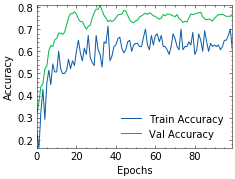

In [11]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['acc'])
    plt.plot(his.history['val_acc'])
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    

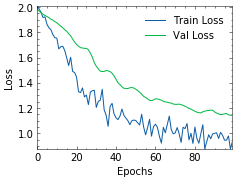

In [12]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['loss'])
    plt.plot(his.history['val_loss'])
    plt.legend(['Train Loss', 'Val Loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    